In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
class linear_regression:
    ''' Make sure that atleast X,y have 1 column '''
    def __init__(self, degree=1):
        self.degree = degree
        self.weights = None
        self.bias = None
        
    def _prepare(self, X):
        n_samples, n_features = X.shape
        X_prepped = np.ones((n_samples, 1))
        
        for d in range(1, self.degree+1):
            X_d = X**d
            X_prepped = np.concatenate((X_prepped, X_d), axis=1)
            
        return X_prepped
        
    def fit(self, X, y, epochs=1000, lr=0.01):
        ''' X is the feature vector and y is the target vector '''
        X = np.array(X)
        y = np.array(y)
        
        X_prepped = self._prepare(X)
        
        n_samples, n_features = X_prepped.shape
        
        self.weights = np.zeros(n_features).reshape(n_features, 1) # Reshape to make it a column vector
        self.bias = 0
        
        frames = []
        
        self._batch_gradient_descent(X_prepped, y, epochs, lr, frames)
        
        # # Gradient Descent
        # for fr in range(epochs):
        #     # compute the h(x)
        #     y_pred = np.dot(X, self.weights) + self.bias
            
        #     if fr % (epochs//120) == 0:
        #         frames.append(y_pred)
            
        #     # compute the gradients
        #     dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
        #     db = (1/n_samples) * np.sum(y_pred - y)
            
        #     self.weights -= lr * dw
        #     self.bias -= lr * db
            
        return frames
    
    def _batch_gradient_descent(self, X, y, epochs=1000, lr=0.01,frames=[]):
        n_samples, n_features = X.shape
        
        # Gradient Descent
        for fr in range(epochs):
            # compute the h(x)
            y_pred = np.dot(X, self.weights) + self.bias
            
            if fr % (epochs//120) == 0:
                frames.append(y_pred)
            
            # compute the gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.weights -= lr * dw
            self.bias -= lr * db
        
    def predict(self, X):
        X = np.array(X)
        X_prepped = self._prepare(X)
        return np.dot(X_prepped, self.weights) + self.bias

[[763.35580172]]


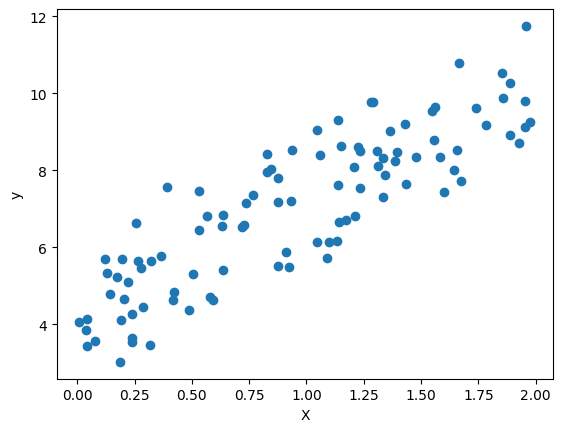

(400,) (400,)
(400, 1) (400, 1)


In [30]:
# Create random data and plot it
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
print(np.dot(X.T, y))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Load from data
data = pd.read_csv('../../data/external/linreg.csv')

X = data['x'].values
y = data['y'].values

print(X.shape, y.shape)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

print(X.shape, y.shape)


## LR on LinReg

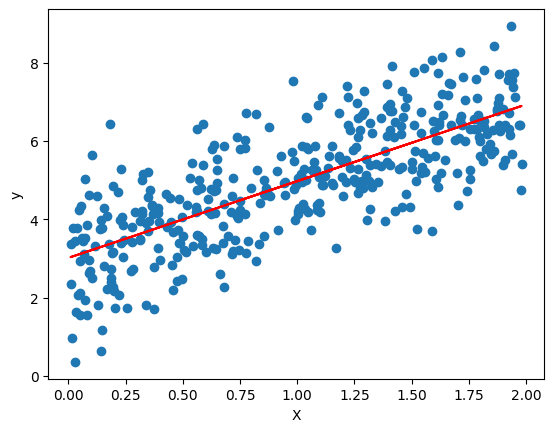

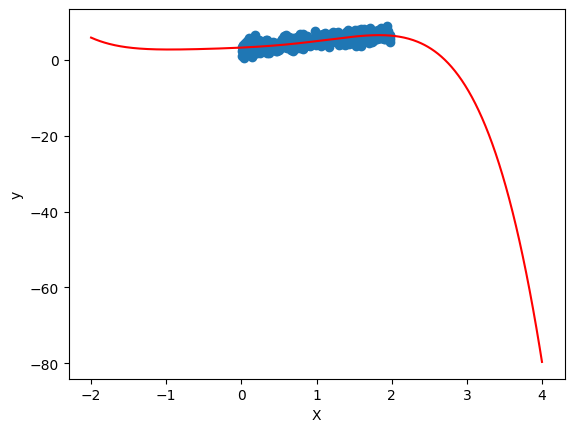

In [53]:
model = linear_regression()
frames = model.fit(X, y, epochs=1000, lr=0.01)

# Plot the regression line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# polynomial Regression
model = linear_regression(degree=5)
frames = model.fit(X, y, epochs=1000, lr=0.01)

# y_pred = model.predict(X)
# print(y_pred.shape)
X_test = np.linspace(-2, 4, 400).reshape(X.shape)
y_pred = model.predict(X_test)

# Plot the regression line
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## LR on random data

(400, 1) (400, 1)


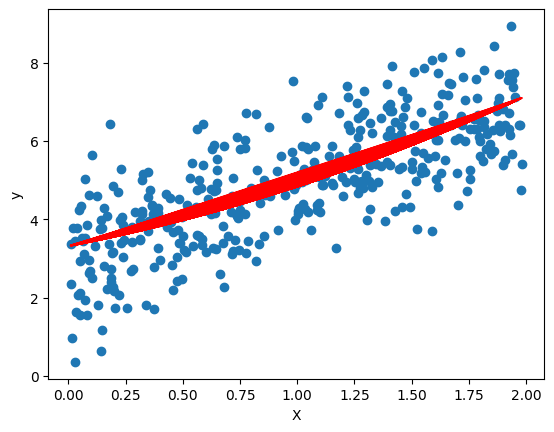

In [45]:
# Do linear regression on the data
model = linear_regression(degree=2)
frames = model.fit(X, y)
y_pred = model.predict(X)

print(X.shape, y_pred.shape)

# Set up animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import cv2

# Set up the figure and axis for animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 10)
ax.set_ylim(y.min() - 1, y.max() + 1)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Linear Regression Animation')
scatter, = ax.plot([], [], 'bo', markersize=8)  # Scatter plot of data points
line, = ax.plot([], [], 'r-', lw=2)  # Line plot of predicted values

# Initialization function for animation
def init():
    scatter.set_data([], [])
    line.set_data([], [])
    return scatter, line

# Animation function
def animate(i):
    scatter.set_data(X, y)
    line.set_data(X, frames[i])
    return scatter, line

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(frames), interval=25, blit=True)

# ani.save('your_animation.mp4', writer='ffmpeg', fps=10)

plt.close(ani._fig)  # Prevents displaying the static figure
# HTML(ani.to_html5_video())

# plot the polynomial regression
plt.scatter(X, y)
X = model._prepare(X)
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


(400, 1) (400, 1)


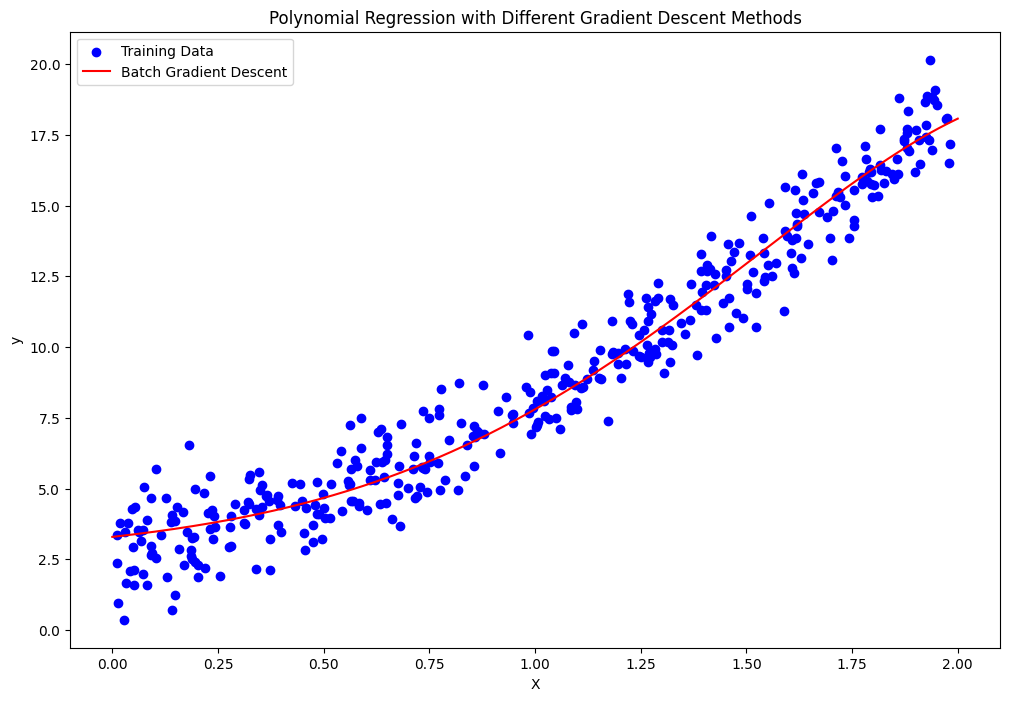

In [54]:
np.random.seed(42)
X = 2 * np.random.rand(400, 1)
y = 3 + 2 * X + 3*X**2 + np.random.randn(400, 1)

# Polynomial Regression
model = linear_regression(degree=5)
frames = model.fit(X, y, epochs=1000, lr=0.01)
# y_pred = model.predict(X)

X_test = np.linspace(0, 2, 400).reshape(400, 1)
y_pred_batch = model.predict(X_test)
# print(X_test)
print(X_test.shape, y_pred_batch.shape)


# Plotting results
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_test, y_pred_batch, color='red', label='Batch Gradient Descent')
# plt.plot(X_test, y_pred_stochastic, color='green', label='Stochastic Gradient Descent')
# plt.plot(X_test, y_pred_minibatch, color='orange', label='Mini-Batch Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression with Different Gradient Descent Methods')
plt.show()